In [56]:
from matplotlib import pyplot as plt
import numpy as np



# Q5

$$
\begin{aligned}
\Dot{S} &= -\beta \frac{S}{N} I\\
\Dot{E} &= \beta \frac{S}{N} I - \omega E \\
\Dot{I} &= \omega E - \gamma I \\
\Dot{R} &= \gamma I
\end{aligned}
$$

In [57]:
def seir (S,E,I,R,prmt):

    (b,w,g,N) = prmt
    
    St = -b*S*I/N
    Et = b*S*I/N - w*E
    It = w*E - g*I
    Rt = g*I
    
    return (St,Et,It,Rt)

In [58]:
def rk4 (S,E,I,R,n,dt,prmt): 
    
    for i in range (n):
            
        (Sa,Ea,Ia,Ra) = seir(S,E,I,R,prmt)
        (Sb,Eb,Ib,Rb) = seir(S+dt*0.5*Sa,E+dt*0.5*Ea,I+dt*0.5*Ia,R+dt*0.5*Ra,prmt)
        (Sc,Ec,Ic,Rc) = seir(S+dt*0.5*Sb,E+dt*0.5*Eb,I+dt*0.5*Ib,R+dt*0.5*Rb,prmt)
        (Sd,Ed,Id,Rd) = seir(S+dt*Sc,E+dt*Ec,I+dt*Ic,R+dt*0.5*Rc,prmt)
        S = S + dt/6*(Sa + 2*Sb + 2*Sc + Sd)
        E = E + dt/6*(Ea + 2*Eb + 2*Ec + Ed)
        I = I + dt/6*(Ia + 2*Ib + 2*Ic + Id)
        R = R + dt/6*(Ra + 2*Rb + 2*Rc + Rd)
        
        yield (S,E,I,R)

#dt = tamanho do passo de integração
#n = número de pontos (x,y,z) que são calculados

In [69]:
def plot2(S,E,I,R,n,dt,prmt):

    (S,E,I,R) = zip(*rk4(S,E,I,R,n,dt,prmt))
    t = [i for i in range(len(S))]
    
    plt.figure(figsize=(15, 5))
    plt.plot(t, S, 'o-',label='Susceptible')
    plt.plot(t, E, 'o-',label='Exposed')
    plt.plot(t, I, 'o-',label='Infectious')
    plt.plot(t, R, 'o-',label='Recovered')
    
    plt.xlabel('Days')
    plt.ylabel('Population')
    plt.title('Fig 3 - SEIR Model')
    plt.legend()
    plt.show()
    
    return

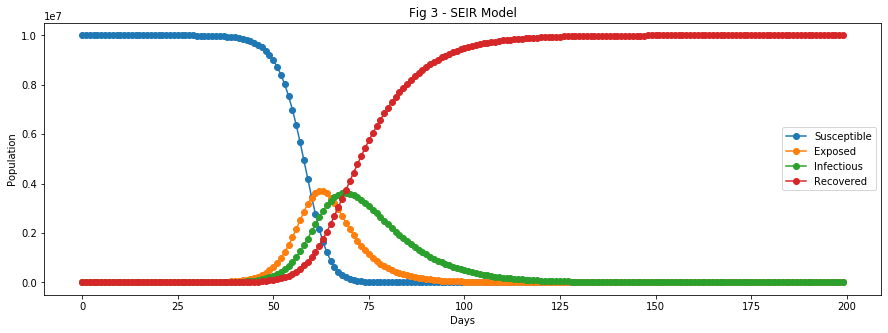

In [70]:
b0 = 0.1; k = 10 ; te = 7 ; ti = 10.25; N = 10000000 #valores dos parâmetros iniciais
b = k*b0 ; w = 1/te ; g = 1/ti #Cálculo dos coeficientes

prmt = (b,w,g,N) #Coeficientes 

n = 200
dt = 1

#Condições iniciais
S0 = N-1 # número de susceptíveis 
E0 = 0   #número de expostos 
I0 = 1   #número de contaminados
R0 = 0   #número de recuperados
plot2(S0,E0,I0,R0,n,dt,prmt)